## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice = mouse_metadata.merge(study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_mice.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
len(combined_mice['Mouse ID'].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_duplicated = combined_mice[combined_mice.duplicated(subset=['Mouse ID', 'Timepoint'])]
combined_duplicated



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# Knowing that it's specifically Mouse g989 that has duplicate instances, we can hone in on the original data frame to identify the duplicate rows.
combined_mice[combined_mice['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
nodupes = combined_mice[combined_mice['Mouse ID'] != 'g989']
nodupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(nodupes['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean = nodupes.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_median = nodupes.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_variance = nodupes.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_standev = nodupes.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_sem = nodupes.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

tumor_summary = pd.DataFrame({'Mean':tumor_mean,
                            'Median':tumor_median,
                            'Variance':tumor_variance,
                            'Standard Deviation':tumor_standev,
                            'SEM':tumor_sem
                            })
tumor_summary


# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean = nodupes.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_median = nodupes.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_variance = nodupes.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_standev = nodupes.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_sem = nodupes.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

tumor_summary = pd.DataFrame({'Mean':tumor_mean,
                            'Median':tumor_median,
                            'Variance':tumor_variance,
                            'Standard Deviation':tumor_standev,
                            'SEM':tumor_sem
                            })
tumor_summary

# This method produces everything in a single groupby function


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice')

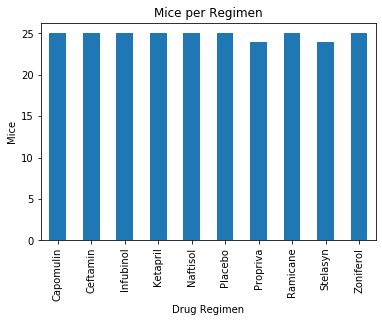

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

bar_chart = nodupes.drop_duplicates(subset='Mouse ID', keep='first').groupby(['Drug Regimen']).count()['Mouse ID'].plot.bar()
bar_chart.set_title("Mice per Regimen")
bar_chart.set_ylabel("Mice")



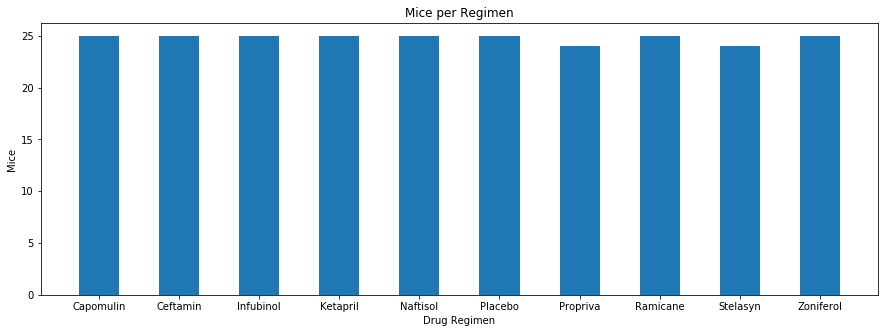

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

bar_values = nodupes.drop_duplicates(subset='Mouse ID', keep='first').groupby(['Drug Regimen']).count()['Mouse ID'].values
bar_index = nodupes.drop_duplicates(subset='Mouse ID', keep='first').groupby(['Drug Regimen']).count()['Mouse ID'].index

plt.figure(figsize=(15,5))
plt.bar(bar_index, bar_values, width=0.5, align='center')
plt.title("Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.show()


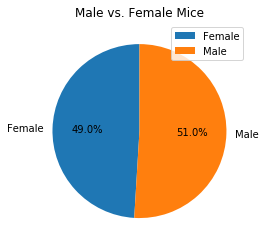

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = nodupes[['Sex', 'Mouse ID']].groupby(['Sex']).count()
gender_df = gender_df.rename(columns={'Mouse ID': ''})
gender_df

panda_pie = gender_df.plot.pie(y='',startangle=90, autopct='%1.1f%%', title="Male vs. Female Mice",)


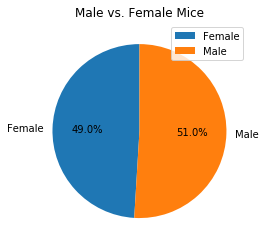

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig1, ax1 = plt.subplots()
ax1.pie(gender_df[''], labels=gender_df.index.values, autopct='%1.1f%%',startangle=90)
plt.title("Male vs. Female Mice")
plt.legend()
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Last_Timepoint = nodupes[['Timepoint', 'Mouse ID']].groupby(['Mouse ID']).max()
Last_Timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df = nodupes.merge(Last_Timepoint, left_on='Mouse ID', right_on='Mouse ID', how='inner')

# To make a data frame listing only the final tumor volume by mouse, we should
# create a subset data frame that only includes rows where the current timepoint
# is equal to the final timepoint identified in final_tumor_df.
final_tumor_df = final_tumor_df[final_tumor_df['Timepoint_x'] == final_tumor_df['Timepoint_y']]

final_tumor_df = final_tumor_df.rename(columns={'Timepoint_x':'Final Timepoint','Tumor Volume (mm3)':'Final Tumor Volume (mm3)'})
final_tumor_df[['Mouse ID', 'Drug Regimen', 'Final Tumor Volume (mm3)']].set_index(['Mouse ID'])

# Obviously, we should create separate data frames for each regimen.
capo_final_tumor = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Capomulin']
rami_final_tumor = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Ramicane']
infu_final_tumor = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Infubinol']
ceft_final_tumor = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Ceftamin']
print("Capomulin Mice:")
print(capo_final_tumor[['Mouse ID', 'Final Tumor Volume (mm3)']])
print("Ramicane Mice:")
print(rami_final_tumor[['Mouse ID', 'Final Tumor Volume (mm3)']])
print("Infubinol Mice:")
print(infu_final_tumor[['Mouse ID', 'Final Tumor Volume (mm3)']])
print("Ceftamin Mice:")
print(ceft_final_tumor[['Mouse ID', 'Final Tumor Volume (mm3)']])


Capomulin Mice:
     Mouse ID  Final Tumor Volume (mm3)
19       s185                 23.343598
29       x401                 28.484033
39       m601                 28.430964
64       f966                 30.485985
104      u364                 31.023923
124      y793                 31.896238
134      r554                 32.377357
144      m957                 33.329098
164      t565                 34.455298
204      i738                 37.311846
224      w914                 36.041047
244      g288                 37.074024
282      l897                 38.846876
299      b742                 38.939633
309      b128                 38.982878
317      j246                 38.753265
337      j119                 38.125164
340      w150                 39.952347
350      v923                 40.658124
360      g316                 40.159220
370      s710                 40.728578
380      l509                 41.483008
390      r944                 41.581521
440      i557           

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = final_tumor_df['Final Tumor Volume (mm3)'].values
Capomulin_list = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Capomulin']['Final Tumor Volume (mm3)']
Ramicane_list = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Ramicane']['Final Tumor Volume (mm3)']
Infubinol_list = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Infubinol']['Final Tumor Volume (mm3)']
Ceftamin_list = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Ceftamin']['Final Tumor Volume (mm3)']

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_Tumors = []
Ramicane_Tumors = []
Infubinol_Tumors = []
Ceftamin_Tumors = []

for ca in Capomulin_list:
    Capomulin_Tumors.append(ca)
for ra in Ramicane_list:
    Ramicane_Tumors.append(ra)
for i in Infubinol_list:
    Infubinol_Tumors.append(i)
for ce in Ceftamin_list:
    Ceftamin_Tumors.append(ce)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

Capomulin_Quartiles = Capomulin_list.quantile([0.25, 0.75])
Capomulin_IQR = Capomulin_Quartiles[0.75] - Capomulin_Quartiles[0.25]
Capomulin_Lower_Bound = Capomulin_Quartiles[0.25] - (1.5 * Capomulin_IQR)
Capomulin_Upper_Bound = Capomulin_Quartiles[0.75] + (1.5 * Capomulin_IQR)
print(f'Capomulin's IQR is {Capomulin_IQR}.')
print(f'Any tumor volumes less than {Capomulin_Lower_Bound} for Capomulin may be an outlier.')
print(f'Any tumor volumes greater than {Capomulin_Upper_Bound} for Capomulin may be an outlier.')

Ramicane_Quartiles = Ramicane_list.quantile([0.25, 0.75])
Ramicane_IQR = Ramicane_Quartiles[0.75] - Ramicane_Quartiles[0.25]
Ramicane_Lower_Bound = Ramicane_Quartiles[0.25] - (1.5 * Ramicane_IQR)
Ramicane_Upper_Bound = Ramicane_Quartiles[0.75] + (1.5 * Ramicane_IQR)
print(f'Ramicane's IQR is {Ramicane_IQR}.')
print(f'Any tumor volumes less than {Ramicane_Lower_Bound} for Ramicane may be an outlier.')
print(f'Any tumor volumes greater than {Ramicane_Upper_Bound} for Ramicane may be an outlier.')

Infubinol_Quartiles = Infubinol_list.quantile([0.25, 0.75])
Infubinol_IQR = Infubinol_Quartiles[0.75] - Infubinol_Quartiles[0.25]
Infubinol_Lower_Bound = Infubinol_Quartiles[0.25] - (1.5 * Infubinol_IQR)
Infubinol_Upper_Bound = Infubinol_Quartiles[0.75] + (1.5 * Infubinol_IQR)
print(f'Infubinol's IQR is {Ramicane_IQR}.')
print(f'Any tumor volumes less than {Infubinol_Lower_Bound} for Infubinol may be an outlier.')
print(f'Any tumor volumes greater than {Infubinol_Upper_Bound} for Infubinol may be an outlier.')

Ceftamin_Quartiles = Ceftamin_list.quantile([0.25, 0.75])
Ceftamin_IQR = Ceftamin_Quartiles[0.75] - Ceftamin_Quartiles[0.25]
Ceftamin_Lower_Bound = Ceftamin_Quartiles[0.25] - (1.5 * Ceftamin_IQR)
Ceftamin_Upper_Bound = Ceftamin_Quartiles[0.75] + (1.5 * Ceftamin_IQR)
print(f'Ceftamin's IQR is {Ramicane_IQR}.')
print(f'Any tumor volumes less than {Ceftamin_Lower_Bound} for Ceftamin may be an outlier.')
print(f'Any tumor volumes greater than {Ceftamin_Upper_Bound} for Ceftamin may be an outlier.')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
print('Capomulin Tumor Values: ')
for x in Capomulin_Tumors:
    print(x)
print('')
print('Ramicane Tumor Values: ')
for x in Ramicane_Tumors:
    print(x)
print('')
print('Infubinol Tumor Values: ')
for x in Infubinol_Tumors:
    print(x)
print('')
print('Ceftamin Tumor Values: ')
for x in Ceftamin_Tumors:
    print(x)
print('')

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
Capomulin_Outliers = []
for x in Capomulin_list:
    if x < Capomulin_Lower_Bound:
        Capomulin_Outliers.append(x)
    elif x > Capomulin_Upper_Bound:
        Capomulin_Outlier.append(x)

Ramicane_Outliers = []
for x in Ramicane_list:
    if x < Ramicane_Lower_Bound:
        Ramicane_Outliers.append(x)
    elif x > Ramicane_Upper_Bound:
        Ramicane_Outlier.append(x)

Infubinol_Outliers = []
for x in Infubinol_list:
    if x < Infubinol_Lower_Bound:
        Infubinol_Outliers.append(x)
    elif x > Infubinol_Upper_Bound:
        Infubinol_Outlier.append(x)

Ceftamin_Outliers = []
for x in Ceftamin_list:
    if x < Ceftamin_Lower_Bound:
        Ceftamin_Outliers.append(x)
    elif x > Ceftamin_Upper_Bound:
        Ceftamin_Outlier.append(x)

print(f'Capomulin Outliers: {Capomulin_Outliers} Ramicane Outliers: {Ramicane_Outliers} Infubinol Outliers: {Infubinol_Outliers} Ceftamin Outliers: {Ceftamin_Outliers}')
    

Capomulin Tumor Values: 
23.34359787
28.48403281
28.43096411
30.48598484
31.02392294
31.896238399999998
32.37735684
33.32909778
34.45529799
37.31184577
36.04104736
37.07402422
38.84687569
38.93963263
38.98287774
38.75326548
38.125164399999996
39.95234669
40.65812366
40.1592203
40.72857787
41.48300765
41.58152074
47.68596303
46.53920617

Ramicane Tumor Values: 
22.05012627
29.12847181
30.27623175
30.56462509
30.63869575
31.56046955
31.09533505
33.39765251
32.97852192
33.56240217
36.13485243
38.81036633
37.22565033
36.37451039
36.56165229
37.31123552
38.34200823
38.407618299999996
40.65900627
40.66771292
45.22086888
43.04754260000001
43.41938077
43.16637266
44.18345092

Infubinol Tumor Values: 
67.97341878
65.52574285
57.03186187
66.08306589
72.2267309
36.321345799999996
60.96971133
62.43540402
60.91876652
67.28962147
66.19691151
62.11727887
47.01036401
60.16518046
55.62942846
45.69933088
54.65654872
55.65068132
46.25011212
54.04860769
51.54243058
50.00513807
58.26844248
67.68556862
62.7

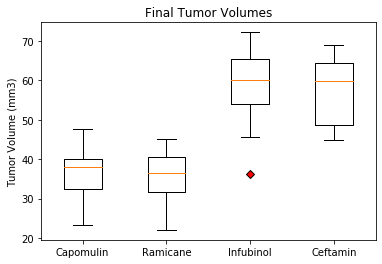

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_data = [Capomulin_Tumors, Ramicane_Tumors, Infubinol_Tumors, Ceftamin_Tumors]
outlier_symbol = dict(markerfacecolor='r', marker='D')
box, ax2 = plt.subplots()
ax2.set_title('Final Tumor Volumes')
ax2.boxplot(boxplot_data, flierprops=outlier_symbol)
ax2.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

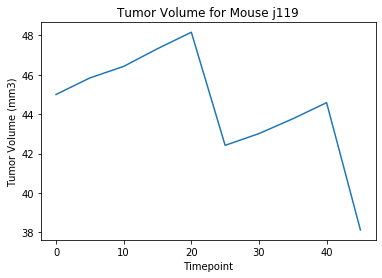

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_mouse = nodupes[nodupes['Mouse ID'] == 'j119'][['Timepoint', 'Tumor Volume (mm3)', 'Mouse ID']].groupby(['Timepoint']).mean()

plt.plot(capo_mouse)
plt.title('Tumor Volume for Mouse j119')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


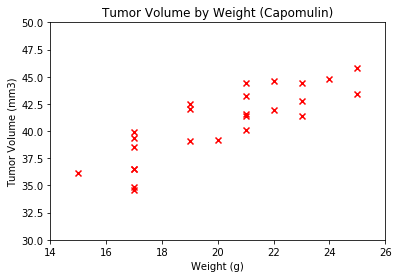

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_mice = nodupes[nodupes['Drug Regimen'] == 'Capomulin'][['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']].groupby(['Mouse ID']).mean()
capo_weight = capo_mice['Weight (g)']
capo_tumor_volume = capo_mice['Tumor Volume (mm3)']
plt.scatter(capo_weight, capo_tumor_volume, marker="x", color="red")
plt.title('Tumor Volume by Weight (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(14,26)
plt.ylim(30,50)
plt.show()


## Correlation and Regression

The correlation coefficient is 0.8419.
The linear regression equation is y = 0.9544x + 21.5522.


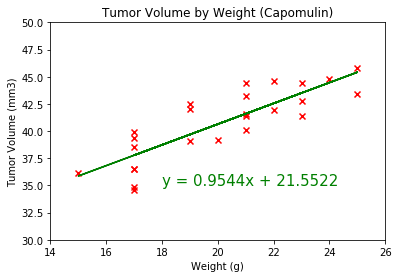

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_weight, capo_tumor_volume)
regression = capo_weight * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
correlation_coefficient = round(st.pearsonr(capo_weight, capo_tumor_volume)[0],4)

print(f'The correlation coefficient is {correlation_coefficient}.')
print(f'The linear regression equation is {linear_equation}.')

plt.scatter(capo_weight, capo_tumor_volume, marker="x", color="red")
plt.plot(capo_weight, regression, "g-")
plt.annotate(linear_equation, (18,35), fontsize=15,color="green")
plt.title('Tumor Volume by Weight (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(14,26)
plt.ylim(30,50)
plt.show()


In [19]:
# Based on the results we found, we can make these conclusions:

#   1. Among the drug regimens, tumor volumes are much higher for Infubinol and
#      Ceftamin than Capomulin and Ramicane.
#   2. For the Capomulin regimen, there is a strong positive correlation between
#      weight and tumor volume.abs
#   3. The study is mostly solid in representing the same number of mice for each #      regimen, and the gender ratio is very balanced.